# Introduction to Pandas

The `pandas` package adds many useful data science capabilities to Python. Here we will give a brief introduction of some features.

<div class="alert alert-success">
<b>Focus Question</b> How can we organize data to make it more useful to us?
</div>

# What does the data look like?

Many times, we can find data in `csv`, or commma-separated values format.
This file format is an easy way for programs to export and import data tables.
Commas (`,`) separate the columns and rows are separated by new lines.
Here is a snippet of a `csv` file with nutrition information for the McDonalds menu.

```
Category,Item,Serving Size,Calories,Calories from Fat, ...
Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13,20,5, ...
Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8,12, ...
Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23,35, ...
Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450, ...
...
```

While this format is convenient for computers, it is a bit hard to read or use for humans.
Most people wouldn't look at the file like this, they would load it into a spreadsheet program like Microsoft Excel or Google Sheets.
Then this same data might look like this:

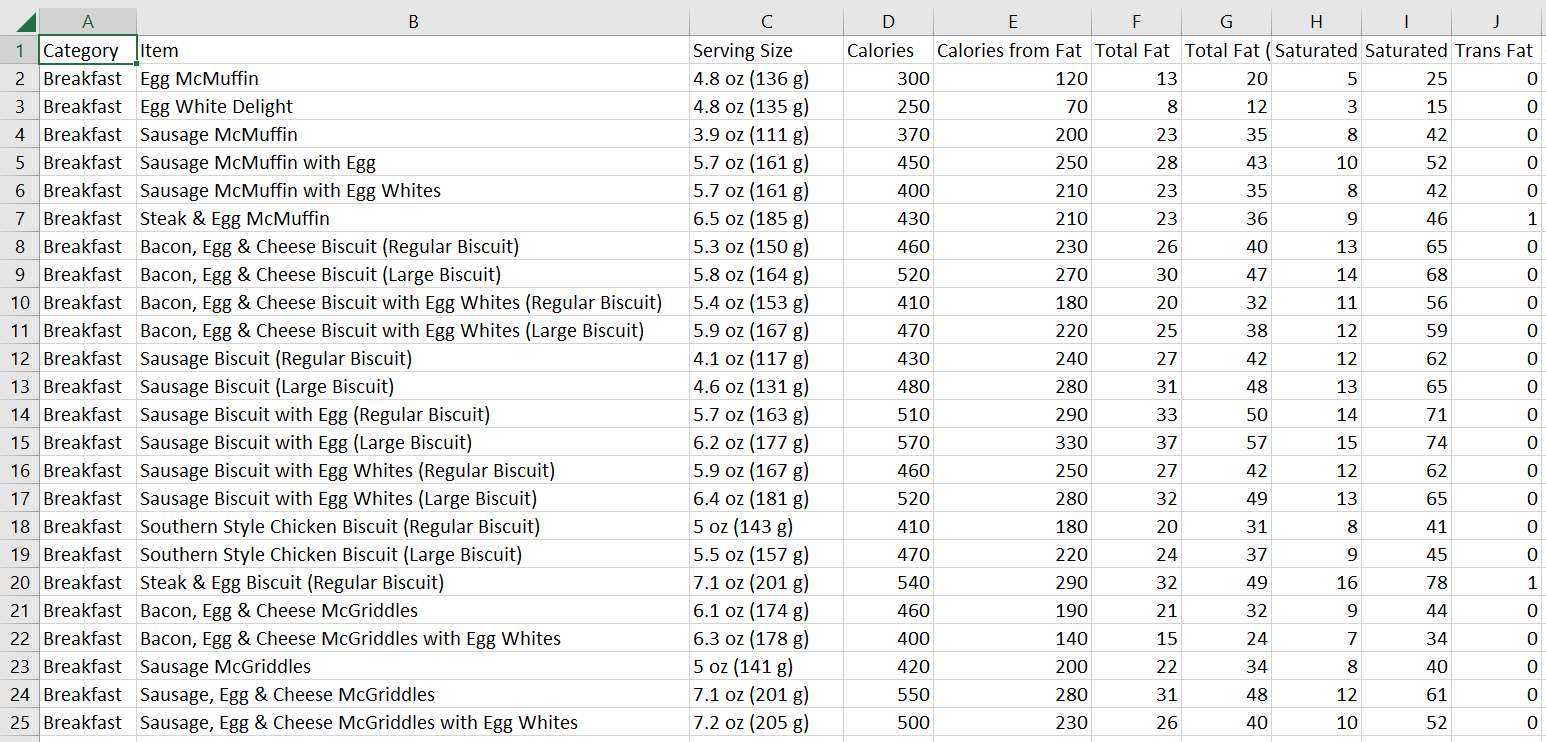

This view is useful because it lets us easily see the rows and columns.
The column labels are clear and any missing data would be identifable as an empty cell.
People with some experience using a spreadsheet program would be able to transform this data so it is more useful.
It's possible to sort the table from greatest number of calories to least number of calories, to find the average amount of fat per item on the menu, or even to filter this list so you can only see breakfast items.
Performing these transformations in a spreadsheet program is beyond the scope of this activity.

Instead, we will use `pandas`, a data analysis and manipulation tool built for Python.

# Import the data

The `pandas` library has many functions built-in.
To use them we must import the package into Python.
This is achieved with the line in the cell below.
Programmers are lazy, so they use the `pd` alias to refer to pandas so they don't have to type quite so many letters.

In [1]:
import pandas as pd

Next, we will read the file `menu.csv` into memory using the `read_csv()` function.
The first line in the cell below creates a DataFrame, which you can think of as a spreadsheet for `pandas`.
This information is assigned to the variable `df`.
The second line gives us a preview so we can see what the data looks like.
The `.head(n)` function will return the first `n` rows of the DataFrame with the default being 5 rows.
There is an equivalent `.tail(n)` function that returns the last `n` rows of the data.

<div class="alert alert-info">
    <b>Try it!</b> Change the value of n in the code cell below, and switch between <tt>df.head()</tt> and <tt>df.tail()</tt> to see how the output changes.
</div>

In [2]:
df = pd.read_csv('menu.csv')
# try changing the number inside the parentheses,
# and try df.tail() instead of df.head()
df.head(3)

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10


I notice a few things about this dataframe right away

1. Some of the data is not shown! There are 260 rows and 24 columns, but I can only see `n` rows and 20 colunns.
1. Each row gets a number, starting from zero
1. Each column has a label (**Category**, **Item**, **Serving Size**, ...)

# Process the data

You can select a particular column of a DataFrame with the following syntax: `df['Column name']`.
This lets you answer particular questions about a column of data.
For example, the code below is how you would ask the following question in `pandas`:

> How many items of each category are present in this DataFrame?

In [3]:
df['Category'].value_counts()

Category
Coffee & Tea          95
Breakfast             42
Smoothies & Shakes    28
Chicken & Fish        27
Beverages             27
Beef & Pork           15
Snacks & Sides        13
Desserts               7
Salads                 6
Name: count, dtype: int64

The output of this function shows that there are 95 menu items with the category of "Coffee & Tea", 42 items in the "Breakfast" category, and so on.

What if we would like to see all of the columns?
The `.info()` function will show information for all of the columns.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

The output of the `.info()` function gives us even more useful information, including:

1. The name of each column
1. How many "Non-Null" or not-empty cells each column has
1. The "Dtype" or data type of each object

This last point is particularly important, because if the column is recognized as a "numeric" type such as `int` or `float`, then `pandas` will recognize it as a number and let you do number-y things.
For example, the function below will show the three menu items with the most protein.

In [5]:
df.nlargest(3, 'Protein')

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
82,Chicken & Fish,Chicken McNuggets (40 piece),22.8 oz (646 g),1880,1060,118.0,182,20.0,101,1.0,...,118,39,6,24,1,87,0,15,8,25
47,Beef & Pork,Double Quarter Pounder with Cheese,10 oz (283 g),750,380,43.0,66,19.0,96,2.5,...,42,14,3,11,10,48,10,2,30,35
81,Chicken & Fish,Chicken McNuggets (20 piece),11.4 oz (323 g),940,530,59.0,91,10.0,50,0.0,...,59,20,3,12,0,44,0,8,4,10


Wow, 87 g of protein in a 40 piece nugget meal with a serving size of 22.8 oz!
I wonder what the maximum serving size on the menu is.
Here is the code to find that.

In [6]:
df['Serving Size'].max()

'9.6 oz (272 g)'

Wait, what?
This is the correct code to get the maximum value of a column, but there seems to be a problem with the output, because 9.6 oz < 22.8 oz.

This is because the data type of the **Serving Size** column is interpreted as a string, not a numeric type.
Therefore the maximum function gives us the item that would come last in alphabetical order[\*](#fn1) instead of the largest number.
We can fix this by extracting the number part out of the column and putting it in a new column.
The code below separates each cell in the serving size column into words by splitting them everywhere there is a space, then turning the first "word" into a number and saving it in a new column called `serving_size_oz`. It goes something like

```python
'9.6 oz (272 g)' -> ['9.6', 'oz', '(272', 'g)'] -> '9.6' -> 9.6
```
<span id="fn1"> * Technically, this is lexiographical order, and has to do with the ones and zeros that computers use to store letters and digits. This is the same reason numbered files will sometimes be ordered 1, 10, 2, 3, ...</span>

In [7]:
df['oz'] = df['Serving Size'].apply(lambda x: float(x.split(' ')[0]))

After the transformation we will look for any **Serving Size** cells that do not contain "oz", because our simple setup does not account for serving sizes not in oz.

In [8]:
# Create a DataFrame column where the cell value is
# True if 'oz' is in the Serving Size column, or
# False if 'oz' is not present
yes_oz = df['Serving Size'].str.contains('oz')
print("Part of the yes_oz column")
print(yes_oz.loc[104:107])

# Create a new DataFrame column with the opposite
# values of yes_oz, i.e. the value should be True
# if 'oz' is NOT present in the cell and False otherwise
no_oz = ~yes_oz
print("\nPart of the no_oz column")
print(no_oz.loc[104:107])

# Output the rows where 'oz' is not present in the
# Serving Size column
df[no_oz]

Part of the yes_oz column
104    False
105    False
106     True
107     True
Name: Serving Size, dtype: bool

Part of the no_oz column
104     True
105     True
106    False
107    False
Name: Serving Size, dtype: bool


,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),oz
104,Desserts,Chocolate Chip Cookie,1 cookie (33 g),160,70,8.0,12,3.5,19,0.0,...,7,1,3,15,2,2,0,2,8,1.0
105,Desserts,Oatmeal Raisin Cookie,1 cookie (33 g),150,50,6.0,9,2.5,13,0.0,...,7,1,3,13,2,2,0,2,6,1.0
130,Beverages,1% Low Fat Milk Jug,1 carton (236 ml),100,20,2.5,4,1.5,8,0.0,...,4,0,0,12,8,10,4,30,0,1.0
131,Beverages,Fat Free Chocolate Milk Jug,1 carton (236 ml),130,0,0.0,0,0.0,0,0.0,...,8,1,2,22,9,10,0,30,8,1.0


Whoops! It looks like 256 of the 260 menu items have the amount of ounces listed as the first "word" in the serving size field, but there are two items where the size is "1 cookie" and two items where the size is "1 carton".
Fortunately we can convert the listed g or ml into oz.
The cell below does this for each of the offending entries by finding the location of the cell using the `.loc[row, column]` function.

Alternatively, we could have used [`.str.extract()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.extract.html#pandas.Series.str.extract) to pull out the number inside the parentheses by using a regex pattern, but that's a little too complicated for this introductory activity.

In [9]:
# 1 g is about 0.0353 oz (so is 1 mL)
g_to_oz = 0.0353

# chocolate chip cookie
df.loc[104, 'oz'] = 33 * g_to_oz
# oatmeal raisin cookie
df.loc[105, 'oz'] = 33 * g_to_oz
# 1% low fat milk jug
df.loc[130, 'oz'] = 236 * g_to_oz
# fat free chocolate milk jug
df.loc[131, 'oz'] = 236 * g_to_oz

Now that we have the serving size in a format we can actually use, we can ask more interesting questions, like:

> Which menu items have the most sugar per ounce?

We must take the following steps to answer that question

1. Create a new column that is the quotient of **Sugars** / **oz**
2. Use the `.nlargest()` function to show the rows with the most sugar per ounce

Here is step 1:

In [10]:
df['grams_sugar_per_serving_size_oz'] = df['Sugars'] / df['oz']

If you would like to rename the column you just made, or any other column, that can be done with the `.rename()` function.
Here we rename the painfully long **grams_sugar_per_serving_size_oz** column to the more pleasant **sugar_per_oz**.
Then we do step 2 to show the ten menu items with the most sugar by weight.

In [11]:
df.rename(columns={'grams_sugar_per_serving_size_oz': 'sugar_per_oz'}, inplace=True)
df.nlargest(10, 'sugar_per_oz')

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),oz,sugar_per_oz
104,Desserts,Chocolate Chip Cookie,1 cookie (33 g),160,70,8.0,12,3.5,19,0.0,...,1,3,15,2,2,0,2,8,1.1649,12.876642
105,Desserts,Oatmeal Raisin Cookie,1 cookie (33 g),150,50,6.0,9,2.5,13,0.0,...,1,3,13,2,2,0,2,6,1.1649,11.159756
252,Smoothies & Shakes,McFlurry with M&M’s Candies (Small),10.9 oz (310 g),650,210,23.0,35,14.0,72,0.5,...,1,6,89,13,15,0,45,8,10.9000,8.165138
254,Smoothies & Shakes,McFlurry with M&M’s Candies (Snack),7.3 oz (207 g),430,140,15.0,24,10.0,48,0.0,...,1,4,59,9,10,0,30,4,7.3000,8.082192
39,Breakfast,Cinnamon Melts,4 oz (114 g),460,170,19.0,30,9.0,43,0.0,...,3,11,32,6,4,0,6,15,4.0000,8.000000
253,Smoothies & Shakes,McFlurry with M&M’s Candies (Medium),16.2 oz (460 g),930,290,33.0,50,20.0,102,1.0,...,2,7,128,20,25,0,70,10,16.2000,7.901235
107,Desserts,Hot Fudge Sundae,6.3 oz (179 g),330,80,9.0,14,7.0,34,0.0,...,1,3,48,8,8,0,25,8,6.3000,7.619048
258,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Medium),14.2 oz (403 g),810,290,32.0,50,15.0,76,1.0,...,2,9,103,21,20,0,60,6,14.2000,7.253521
259,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Snack),7.1 oz (202 g),410,150,16.0,25,8.0,38,0.0,...,1,5,51,10,10,0,30,4,7.1000,7.183099
109,Desserts,Strawberry Sundae,6.3 oz (178 g),280,60,6.0,10,4.0,20,0.0,...,0,0,45,6,8,4,20,0,6.3000,7.142857


That's the information that we want, but all 26 columns might be too much.
We can use the `.loc[rows, columns]` function, where `rows` are the row numbers of the top 10 highest sugar-per-ounce foods and `columns` is the list of column names we want to see.

In [12]:
# Get the row number (index) for each of the top 10 items in terms of sugar per oz
rows = df.nlargest(10, 'sugar_per_oz').index
# Which columns do we want to see, and in which order?
columns = ['Category', 'Item', 'sugar_per_oz', 'Calories', 'Total Fat', 'Carbohydrates', 'Protein']

df.loc[rows, columns]

,Category,Item,sugar_per_oz,Calories,Total Fat,Carbohydrates,Protein
104,Desserts,Chocolate Chip Cookie,12.876642,160,8.0,21,2
105,Desserts,Oatmeal Raisin Cookie,11.159756,150,6.0,22,2
252,Smoothies & Shakes,McFlurry with M&M’s Candies (Small),8.165138,650,23.0,96,13
254,Smoothies & Shakes,McFlurry with M&M’s Candies (Snack),8.082192,430,15.0,64,9
39,Breakfast,Cinnamon Melts,8.000000,460,19.0,66,6
253,Smoothies & Shakes,McFlurry with M&M’s Candies (Medium),7.901235,930,33.0,139,20
107,Desserts,Hot Fudge Sundae,7.619048,330,9.0,53,8
258,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Medium),7.253521,810,32.0,114,21
259,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Snack),7.183099,410,16.0,57,10
109,Desserts,Strawberry Sundae,7.142857,280,6.0,49,6


As you may have guessed, foods from the "Desserts" and "Smoothies & Shakes" categories are well represented in the top 10 most sugary foods on the menu.

What if we wanted to see the top food from each category in terms of sugar per ounce?
We can use the `.groupby()` function to group our data by a particular column (such as the **Category** column).
We can ask the same questions of the grouped DataFrame as we could the regular DataFrame.
For example:

> What are the first two rows of every category?

Just like the DataFrame earlier, we use the `.head(2)` function to get the first two rows

In [13]:
df.groupby('Category').head(2)

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),oz,sugar_per_oz
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,4,17,3,17,10,0,25,15,4.8000,0.625000
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,4,17,3,18,6,0,25,8,4.8000,0.625000
42,Beef & Pork,Big Mac,7.4 oz (211 g),530,240,27.0,42,10.0,48,1.0,...,3,13,9,24,6,2,25,25,7.4000,1.216216
43,Beef & Pork,Quarter Pounder with Cheese,7.1 oz (202 g),520,240,26.0,41,12.0,61,1.5,...,3,11,10,30,10,2,30,25,7.1000,1.408451
57,Chicken & Fish,Premium Crispy Chicken Classic Sandwich,7.5 oz (213 g),510,200,22.0,33,3.5,18,0.0,...,3,13,10,24,4,6,15,20,7.5000,1.333333
58,Chicken & Fish,Premium Grilled Chicken Classic Sandwich,7 oz (200 g),350,80,9.0,13,2.0,9,0.0,...,3,13,8,28,4,8,15,20,7.0000,1.142857
84,Salads,Premium Bacon Ranch Salad (without Chicken),7.9 oz (223 g),140,70,7.0,11,3.5,18,0.0,...,3,12,4,9,170,30,15,6,7.9000,0.506329
85,Salads,Premium Bacon Ranch Salad with Crispy Chicken,9 oz (255 g),380,190,21.0,33,6.0,29,0.0,...,2,10,5,25,100,25,15,8,9.0000,0.555556
90,Snacks & Sides,Chipotle BBQ Snack Wrap (Crispy Chicken),4.6 oz (130 g),340,130,15.0,23,4.5,22,0.0,...,1,6,8,14,4,0,10,10,4.6000,1.739130
91,Snacks & Sides,Chipotle BBQ Snack Wrap (Grilled Chicken),4.3 oz (123 g),260,70,8.0,13,3.5,18,0.0,...,1,6,7,16,4,2,10,10,4.3000,1.627907


Perfect!
So instead of giving the first two rows of the DataFrame, this grouped version returned the first two rows of each group.
We could also get the average value of each column for each group like so:

In [14]:
df.groupby('Category').mean(numeric_only=True)

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),oz,sugar_per_oz
Category,,,,,,,,,,,,,,,,,,,,,
Beef & Pork,494.000000,224.666667,24.866667,38.600000,10.466667,52.000000,1.100000,87.333333,28.933333,1020.666667,...,2.533333,9.866667,8.800000,27.333333,6.933333,7.333333,23.000000,23.333333,6.840000,1.315954
Beverages,113.703704,0.740741,0.092593,0.148148,0.055556,0.296296,0.000000,0.555556,0.185185,41.481481,...,0.037037,0.074074,27.851852,1.333333,0.740741,23.481481,2.962963,0.296296,17.946726,1.609691
Breakfast,526.666667,248.928571,27.690476,42.666667,10.654762,53.428571,0.107143,152.857143,50.952381,1211.071429,...,3.261905,12.833333,8.261905,19.857143,6.928571,8.904762,16.166667,17.142857,7.126190,1.180760
Chicken & Fish,552.962963,242.222222,26.962963,41.333333,6.166667,31.111111,0.129630,75.370370,25.222222,1257.777778,...,2.925926,11.814815,7.333333,29.111111,20.444444,12.629630,15.444444,16.370370,8.574074,0.876260
Coffee & Tea,283.894737,71.105263,8.021053,12.357895,4.921053,24.368421,0.142105,27.263158,9.378947,136.894737,...,0.778947,3.178947,39.610526,8.863158,10.736842,0.000000,28.294737,2.147368,17.578947,2.368220
Desserts,222.142857,64.285714,7.357143,11.142857,4.285714,21.285714,0.000000,15.000000,4.857143,117.142857,...,1.000000,3.428571,26.142857,4.000000,5.142857,4.142857,11.428571,4.000000,3.575686,8.047410
Salads,270.000000,108.333333,11.750000,18.333333,3.750000,18.500000,0.000000,51.666667,17.333333,588.333333,...,4.500000,18.500000,6.833333,19.833333,146.666667,28.333333,15.000000,10.333333,9.600000,0.682714
Smoothies & Shakes,531.428571,127.678571,14.125000,21.714286,8.375000,41.785714,0.535714,45.000000,14.714286,183.571429,...,1.464286,5.750000,77.892857,10.857143,18.750000,6.964286,35.571429,3.964286,15.139286,5.394185
Snacks & Sides,245.769231,94.615385,10.538462,16.230769,2.692308,13.384615,0.000000,18.461538,6.230769,395.769231,...,1.538462,7.076923,4.076923,8.384615,4.846154,28.153846,6.000000,6.615385,3.792308,1.019426


Finally, we are ready to answer the question: 

> What is the top food from each category in terms of sugar per ounce?

We will:
1. Group our data by category
1. Find the index (row number) of the item in each category with the most sugar per ounce
1. Use `.loc[rows, columns]` function to show the relevant part of the data

In [15]:
# Step 1: group the data
category_groups = df.groupby('Category')

# Step 2: Find the index of the max value for each group
max_idx = category_groups['sugar_per_oz'].idxmax()

# Step 3: Show the results
df.loc[max_idx, columns]

,Category,Item,sugar_per_oz,Calories,Total Fat,Carbohydrates,Protein
49,Beef & Pork,Cheeseburger,1.750000,290,11.0,33,15
132,Beverages,Minute Maid 100% Apple Juice Box,3.166667,80,0.0,21,0
39,Breakfast,Cinnamon Melts,8.000000,460,19.0,66,6
63,Chicken & Fish,Bacon Clubhouse Crispy Chicken Sandwich,1.600000,750,38.0,65,36
229,Coffee & Tea,Frappé Chocolate Chip (Small),5.583333,530,23.0,76,8
104,Desserts,Chocolate Chip Cookie,12.876642,160,8.0,21,2
88,Salads,Premium Southwest Salad with Crispy Chicken,0.975610,450,22.0,42,23
252,Smoothies & Shakes,McFlurry with M&M’s Candies (Small),8.165138,650,23.0,96,13
102,Snacks & Sides,Fruit 'n Yogurt Parfait,4.423077,150,2.0,30,4


In [16]:
import plotly.express as px